<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">Vérification empirique des résultats du modèle de Solow</h1>
<br>
<p style="font-family: 'Georgia', serif; text-align: center;  color:green;">Réalisé par</p>
<br>
<p style="font-family: 'Georgia', serif; text-align: center;  color:white;">Mawuéna Elisée AMEMWOUAME</p>
<br>
<p style="font-family: 'Georgia', serif; text-align: center;  color:white;">Alex KOUTONSOU</p>
<br>
<p style="font-family: 'Georgia', serif; text-align: center;  color:white;">Bryan</p>
<br>
<p style="font-family: 'Georgia', serif; text-align: center;  color:green;">Sous l'encadrement de:</p>
<br>
<p style="font-family: 'Georgia', serif; text-align: center;  color:white;">Lino GALIANA</p>
<br>
<div style="border-top: 3px solid blue; width: 90%; margin: 20px auto;"></div>

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">Préparation des données</h1>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Dans cette partie nous allons créer les DataFrames nécessaires à notre projet. Nous utiliserons pour cela les données de la banque en les téléchargeant directement via une url. L'objectif étant de vérifier empiriquement les résulats du modèle de Solow nous aurons besoins de variables suivantes:</p>

<ul>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">'GDP (constant 2015 US$)' de code 'NY.GDP.MKTP.KD' sur la banque mondiale. Il s'agit du PIB ajustée pour l'inflation, exprimée en dollars américains de l'année de référence 2015.</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">'Population ages 15-64, total' de code 'SP.POP.1564.TO' sur la banque mondiale. Il s'agit de la population en age de travailler (15-64 ans).</li>
  <li style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">'Gross Fixed Capital Formation (constant 2015 US$)' de code 'NE.GDI.FTOT.KD'. Il s'agit de la formation brute de capital fixe ajustée pour l'inflation, exprimée en dollars américains de l'année de référence 2015.</li>
</ul>


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Nous allons donc récupérer pour l'ensemble des pays dont les données sont disponibles sur la banque mondiale, les valeurs de chacun de ces indicateurs séparément. Après nettoyage et traitement de chaque base obtenu (chaque base représentera alors les valeurs pour chaque indicateur), nous ferons la fusion afin d'obtenir une base complète prête à l'emploi. <br> Pour des soucis de simplicité, nous  nous limiterons aux données de 1990 à 2023. Ce choix se justifie bien car cette période garantit des données fiables, comparables entre pays, avec des transformations économiques majeures comme la mondialisation et des crises clés (2008, COVID-19). Elle offre une durée suffisante pour analyser les tendances à long terme du modèle de Solow.</p>

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">I- Importation et installation des packages.</h1>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Tous les imports nécessaires à ce projet se feront dans le fichier "Declarations.py" afin que des ajouts ou suppressions éventuelles puissent se faire plus facilement. Ce fichier sera donc appelé au début du script.</p>

In [130]:
from importlib import reload
import Declarations as d
reload(d)

<module 'Declarations' from 'd:\\ENSAE-PARIS\\Semestre 1\\Python avec data science\\Projet_Python\\src\\Declarations.py'>

<h1 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">II- Construction de la base de données</h1>

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">II.1- Importation des données de PIB (prix contants de 2015)</h2>

In [14]:
# Nous importons d'abord les codes pays grace à l'url de la banque mondiale
url = "http://api.worldbank.org/v2/country?format=json&per_page=300"
countries = d.get_worldbank_country_codes(url)
countries

'ABW;AFG;AGO;ALB;AND;ARE;ARG;ARM;ASM;ATG;AUS;AUT;AZE;BDI;BEL;BEN;BFA;BGD;BGR;BHR;BHS;BIH;BLR;BLZ;BMU;BOL;BRA;BRB;BRN;BTN;BWA;CAF;CAN;CHE;CHI;CHL;CHN;CIV;CMR;COD;COG;COL;COM;CPV;CRI;CUB;CUW;CYM;CYP;CZE;DEU;DJI;DMA;DNK;DOM;DZA;ECU;EGY;ERI;ESP;EST;ETH;FIN;FJI;FRA;FRO;FSM;GAB;GBR;GEO;GHA;GIB;GIN;GMB;GNB;GNQ;GRC;GRD;GRL;GTM;GUM;GUY;HKG;HND;HRV;HTI;HUN;IDN;IMN;IND;IRL;IRN;IRQ;ISL;ISR;ITA;JAM;JOR;JPN;KAZ;KEN;KGZ;KHM;KIR;KNA;KOR;KWT;LAO;LBN;LBR;LBY;LCA;LIE;LKA;LSO;LTU;LUX;LVA;MAC;MAF;MAR;MCO;MDA;MDG;MDV;MEX;MHL;MKD;MLI;MLT;MMR;MNE;MNG;MNP;MOZ;MRT;MUS;MWI;MYS;NAM;NCL;NER;NGA;NIC;NLD;NOR;NPL;NRU;NZL;OMN;PAK;PAN;PER;PHL;PLW;PNG;POL;PRI;PRK;PRT;PRY;PSE;PYF;QAT;ROU;RUS;RWA;SAU;SDN;SEN;SGP;SLB;SLE;SLV;SMR;SOM;SRB;SSD;STP;SUR;SVK;SVN;SWE;SWZ;SXM;SYC;SYR;TCA;TCD;TGO;THA;TJK;TKM;TLS;TON;TTO;TUN;TUR;TUV;TZA;UGA;UKR;URY;USA;UZB;VCT;VEN;VGB;VIR;VNM;VUT;WSM;XKX;YEM;ZAF;ZMB;ZWE'

In [8]:
len(countries.split(';'))

217

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Ainsi nous avons récupérer les codes ISO de 217 pays. Avec cela, nous allons télécharger les données de PIB pour tous ces pays toujours à partir des données de la banque mondiale. La variable recherchée est GDP (constant 2015 US$) de code NY.GDP.MKTP.KD</p>

In [143]:
# Importation des données pour le PIB
data_gdp = d.fetch_worldbank_data(countries, "NY.GDP.MKTP.KD", 1990, 2023)
data_gdp.head()

Téléchargement de données réussi


,Country,Country_Code,Year,GDP (constant 2015 US$)
0,Aruba,ABW,2023,3.347290e+09
1,Aruba,ABW,2022,3.210407e+09
2,Aruba,ABW,2021,2.958412e+09
3,Aruba,ABW,2020,2.383267e+09
4,Aruba,ABW,2019,3.229876e+09


In [116]:
# Vérification des doublons
print("Nombre total de doublons dans data_gdp :",
      data_gdp[data_gdp.duplicated()].shape[0])

Nombre total de doublons dans ocde_data : 0


In [89]:
data_gdp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7378 entries, 0 to 7377
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  7378 non-null   object 
 1   Country_Code             7378 non-null   object 
 2   Year                     7378 non-null   object 
 3   GDP (constant 2015 US$)  6858 non-null   float64
dtypes: float64(1), object(3)
memory usage: 230.7+ KB


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">La colonne GDP (constant 2015 US$) contient des valeurs manquantes. Nous allons regarder cela de plus près.</p>

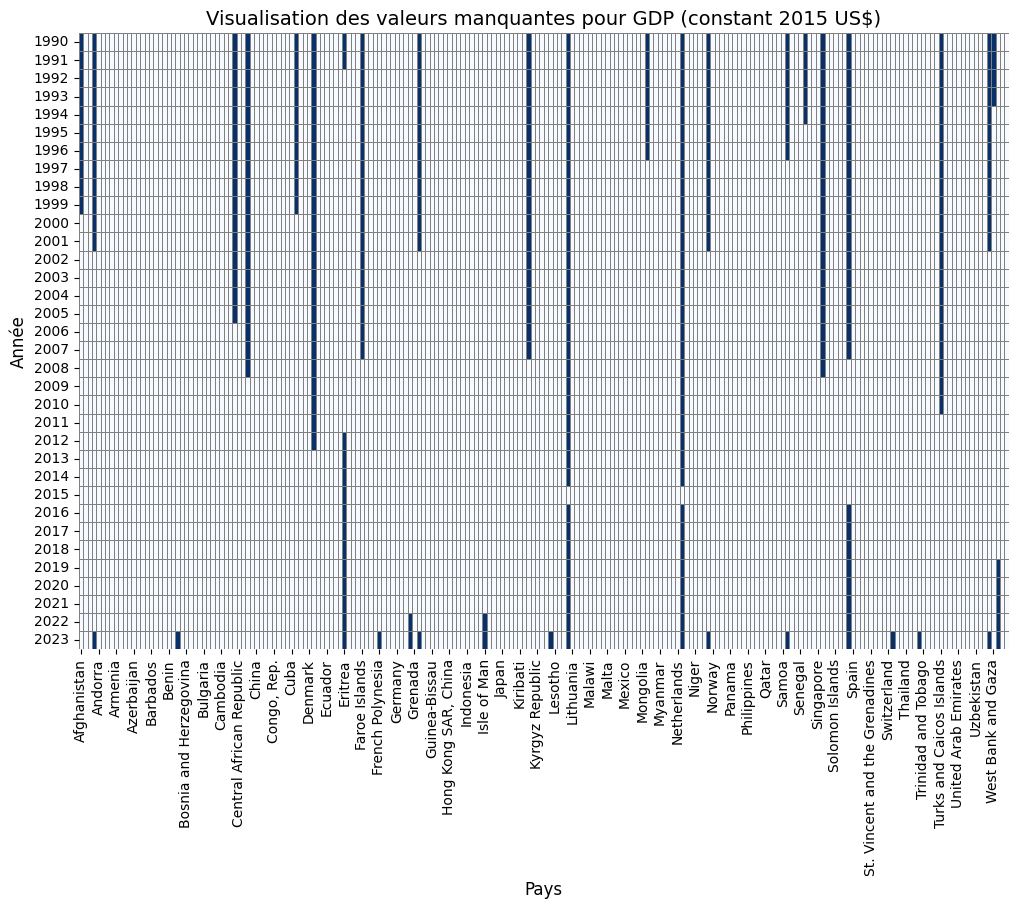

In [109]:
# Visualisation  des valeurs manquantes
d.visualize_missing_values(data_gdp, 'GDP (constant 2015 US$)')

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Certains pays possèdent presque 100% de valeurs manquantes. La plupart de ces valeurs manquantes datent des années 1900. </br> Nous faisons une analyse temporelle qui s'étend de 1990 à 2023. C'est à dire que pour chaque pays on dispose des valeurs du PIB de 1990 à 2023. Nous allons donc supprimer de l'analyse les pays dont les données sont manquantes pour plus de 20% des observations.</p>

In [110]:
# Afficher le pourcentage de valeurs manquantes pour les pays à valeurs manquantes
d.calculate_missing_percentage(data_gdp[data_gdp['GDP (constant 2015 US$)'].isna()], 'GDP (constant 2015 US$)')


Country
Afghanistan                   29.411765
American Samoa                38.235294
Bhutan                         2.941176
British Virgin Islands       100.000000
Cayman Islands                47.058824
Channel Islands               55.882353
Curacao                       29.411765
Djibouti                      67.647059
Eritrea                       41.176471
Faroe Islands                 52.941176
French Polynesia               2.941176
Gibraltar                    100.000000
Greenland                      5.882353
Guam                          38.235294
Isle of Man                    5.882353
Korea, Dem. People's Rep.    100.000000
Kosovo                        52.941176
Lebanon                        2.941176
Liechtenstein                 97.058824
Montenegro                    20.588235
New Caledonia                 97.058824
Northern Mariana Islands      38.235294
San Marino                    23.529412
Serbia                        14.705882
Sint Maarten (Dutch part)     55

In [144]:
# Suppression des pays avec plus de 20% des données manquantes
data_gdp= d.remove_countries_with_missing_values(data_gdp, 'GDP (constant 2015 US$)')

Pays supprimés (avec plus de 20% de valeurs manquantes):
['Afghanistan', 'American Samoa', 'British Virgin Islands', 'Cayman Islands', 'Channel Islands', 'Curacao', 'Djibouti', 'Eritrea', 'Faroe Islands', 'Gibraltar', 'Guam', "Korea, Dem. People's Rep.", 'Kosovo', 'Liechtenstein', 'Montenegro', 'New Caledonia', 'Northern Mariana Islands', 'San Marino', 'Sint Maarten (Dutch part)', 'South Sudan', 'St. Martin (French part)', 'Turks and Caicos Islands', 'Venezuela, RB', 'Virgin Islands (U.S.)']


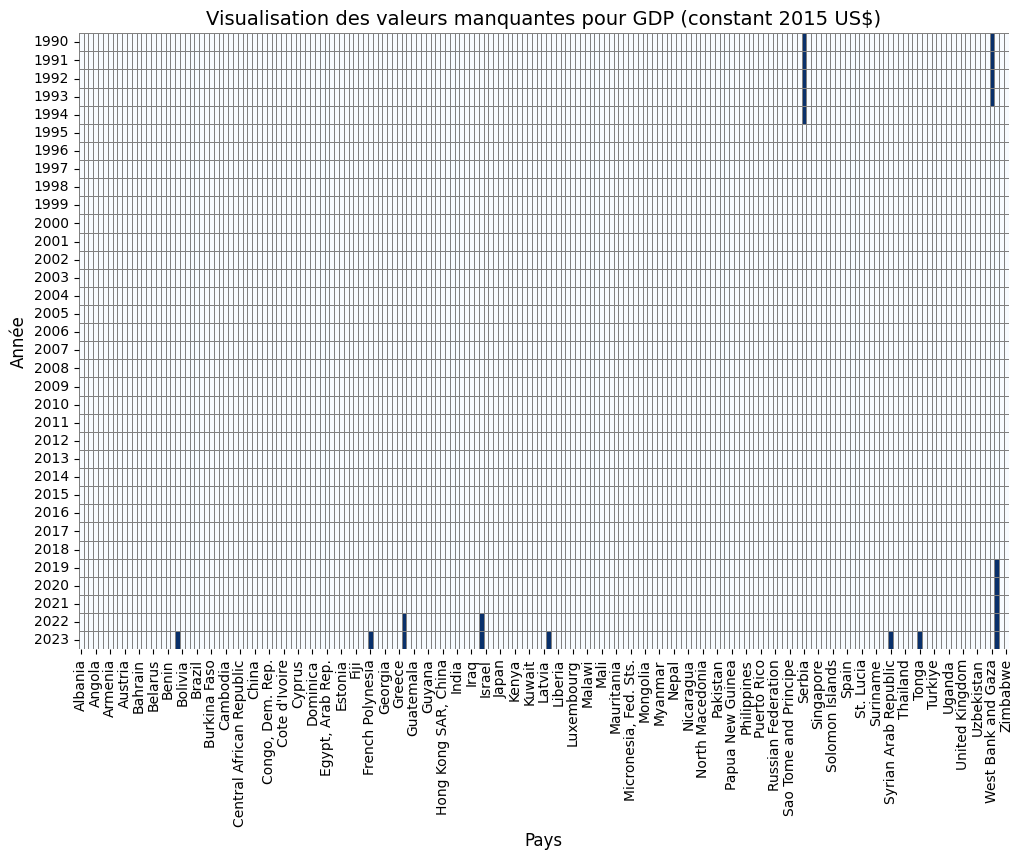

In [112]:
# Visualisation  des valeurs manquantes
d.visualize_missing_values(data_gdp, 'GDP (constant 2015 US$)')

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Le nombre de valeurs manquantes a énormément diminué cependant il en reste encore. Nous allons imputer ces dernières par la médiane qui est plus robuste aux valeurs abbérantes.</p>

In [145]:
# Imputation par la médiane
data_gdp = d.impute_missing_values_by_median(data_gdp,'GDP (constant 2015 US$)')

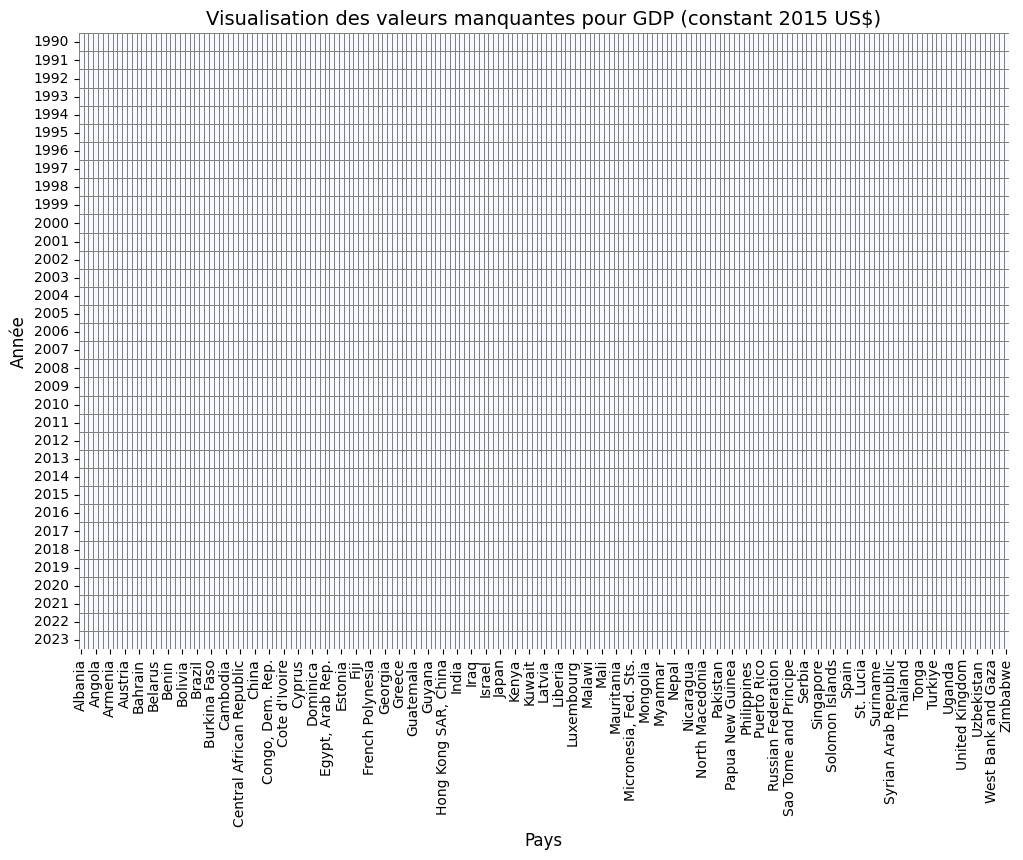

In [115]:
# Visualisation  des valeurs manquantes
d.visualize_missing_values(data_gdp, 'GDP (constant 2015 US$)')

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Les valeurs manquantes sont totalement imputées. On obtient ainsi une base propre prete à l'analyse.</p>

In [119]:
data_gdp.head()

,Country,Country_Code,Year,GDP (constant 2015 US$)
0,Albania,ALB,2023,1.488217e+10
1,Albania,ALB,2022,1.431851e+10
2,Albania,ALB,2021,1.365922e+10
3,Albania,ALB,2020,1.253490e+10
4,Albania,ALB,2019,1.296450e+10


<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">II.2- Importation et traitement de la base du FBC</h2>

In [126]:
# Importation des données pour la formation brute de capital fixe
data_gfcf = d.fetch_worldbank_data(countries, 'NE.GDI.FTOT.KD', 1990, 2023)
data_gfcf.head()

Téléchargement de données réussi


,Country,Country_Code,Year,Gross Fixed Capital Formation (constant 2015 US$)
0,Aruba,ABW,2023,NaN
1,Aruba,ABW,2022,NaN
2,Aruba,ABW,2021,NaN
3,Aruba,ABW,2020,NaN
4,Aruba,ABW,2019,NaN


In [127]:
# Vérification des doublons
print("Nombre total de doublons dans data_gfcf :",
      data_gfcf[data_gfcf.duplicated()].shape[0])

Nombre total de doublons dans data_gfcf : 0


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Il n'y a pas de doublons dans la base.</p>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">La colonne 'Gross Fixed Capital Formation (constant 2015 US$)' contient des valeurs manquantes que nous allons analyser de plus près. </p>

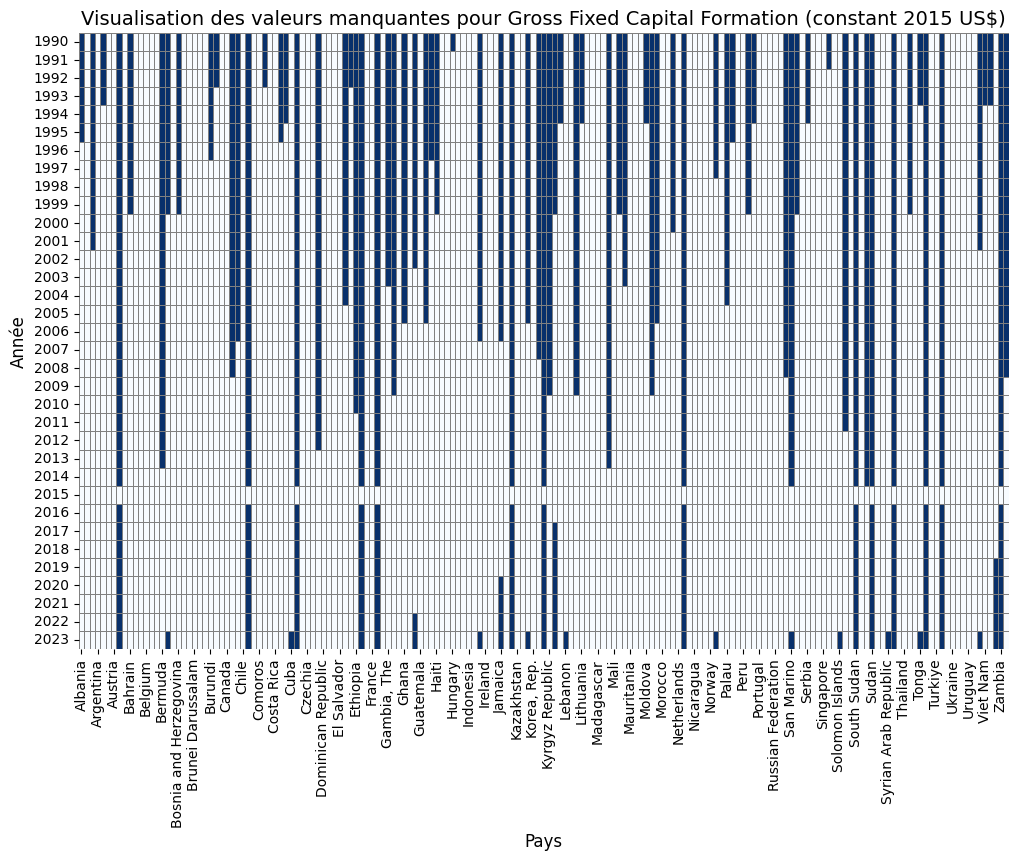

In [131]:
# Visualisation  des valeurs manquantes
d.visualize_missing_values(data_gfcf, 'Gross Fixed Capital Formation (constant 2015 US$)')

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">De meme, ici nous n'allons garder que les pays qui ont moins de 20% de valeurs manquantes </p>

In [134]:
# Suppression des pays avec plus de 20% des données manquantes
data_gfcf= d.remove_countries_with_missing_values(data_gfcf, 'Gross Fixed Capital Formation (constant 2015 US$)')


Pays supprimés (avec plus de 20% de valeurs manquantes):
[]


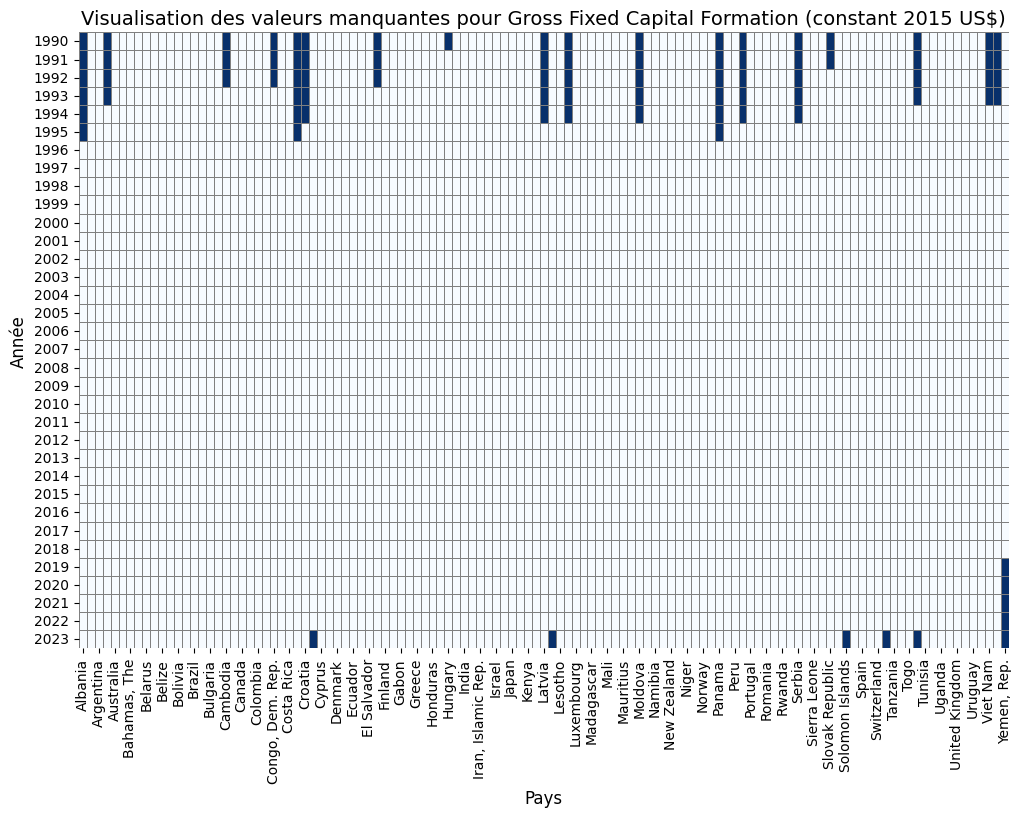

In [135]:
# Visualisation  des valeurs manquantes
d.visualize_missing_values(data_gfcf, 'Gross Fixed Capital Formation (constant 2015 US$)')

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Nous imputerons également les autres valeurs manquantes par la médiane. </p>

In [136]:
# Imputation par la médiane
data_gfcf = d.impute_missing_values_by_median(data_gfcf, 'Gross Fixed Capital Formation (constant 2015 US$)')

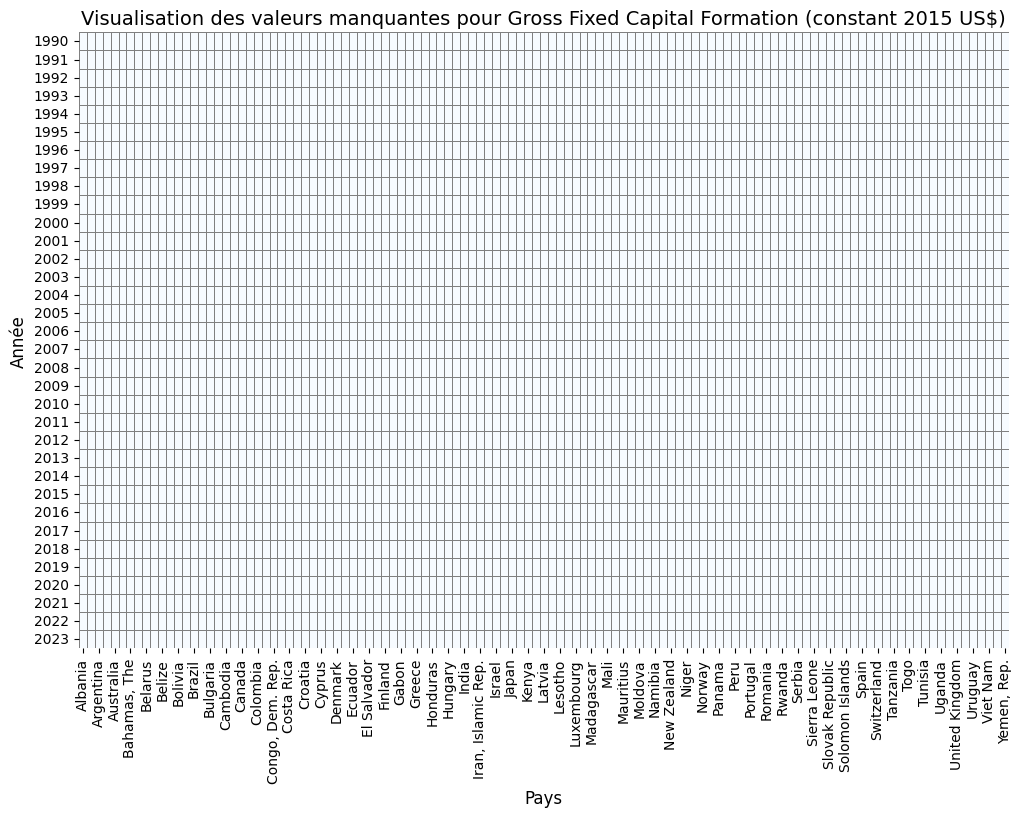

In [137]:
# Visualisation  des valeurs manquantes
d.visualize_missing_values(data_gfcf, 'Gross Fixed Capital Formation (constant 2015 US$)')

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Ainsi nous obtenons une base propre prête à l'emploi.</p>

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">II.3- Importation et traitement de la base de la population en âge de travailler</h2>

In [138]:
# Importation des données pour la formation brute de capital fixe
data_pop = d.fetch_worldbank_data(countries, 'SP.POP.1564.TO', 1990, 2023)
data_pop.head()

Téléchargement de données réussi


,Country,Country_Code,Year,"Population ages 15-64, total"
0,Aruba,ABW,2023,71335
1,Aruba,ABW,2022,71635
2,Aruba,ABW,2021,72127
3,Aruba,ABW,2020,72936
4,Aruba,ABW,2019,73736


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">Nous allons procéder exactement comme avec les précédentes bases de données.</p>

In [139]:
# Vérification des doublons
print("Nombre total de doublons dans data_pop :",
      data_pop[data_pop.duplicated()].shape[0])

Nombre total de doublons dans data_pop : 0


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">La base ne contient pas de doublons.</p>

In [142]:
data_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7378 entries, 0 to 7377
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Country                       7378 non-null   object
 1   Country_Code                  7378 non-null   object
 2   Year                          7378 non-null   object
 3   Population ages 15-64, total  7378 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 230.7+ KB


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">La base ne contient aucune valeur manquante non plus. Elle est prête à l'emploi</p>

<h2 style="font-family: 'Georgia', serif; text-align: center; font-size: 30px; color: #3498db;">II.4- Base finale</h2>

<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">A présent nous allons fusionner ces 3 bases afin d'obtenir une base unique sur laquelle nous pourrons faire nos analyses. Chaque base contient les noms de pays et leur code ISO. Nous allons donc procéder à la fusion en utilisant comme clé de fusion les codes pays ainsi que les années. Nous supprimerons automatiquement les pays qui n'auront pas été appariés afin de mener des analyses plus fiables.</p>

In [148]:
# Fusionner les bases successivement avec une jointure interne
merged_data = data_gdp.merge(data_pop, on=['Country','Country_Code', 'Year'], how='inner')
merged_data = merged_data.merge(data_gfcf, on=['Country','Country_Code', 'Year'], how='inner')

# Affichage des premières lignes
merged_data.head()

,Country,Country_Code,Year,GDP (constant 2015 US$),"Population ages 15-64, total",Gross Fixed Capital Formation (constant 2015 US$)
0,Albania,ALB,2023,1.488217e+10,1830356,3.677166e+09
1,Albania,ALB,2022,1.431851e+10,1861085,3.639207e+09
2,Albania,ALB,2021,1.365922e+10,1894123,3.581034e+09
3,Albania,ALB,2020,1.253490e+10,1921536,2.995235e+09
4,Albania,ALB,2019,1.296450e+10,1941067,3.021867e+09


In [156]:
print(f'il y a {len(merged_data['Country'].unique())} pays dans la base')
merged_data.info()

il y a 117 pays dans la base
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3978 entries, 0 to 3977
Data columns (total 6 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            3978 non-null   object 
 1   Country_Code                                       3978 non-null   object 
 2   Year                                               3978 non-null   object 
 3   GDP (constant 2015 US$)                            3978 non-null   float64
 4   Population ages 15-64, total                       3978 non-null   int64  
 5   Gross Fixed Capital Formation (constant 2015 US$)  3978 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 186.6+ KB


<p style="line-height: 1.6; font-family: 'Serial', serif; font-size: 16px;  color:white;">La base contient 6 colonnes et 3978 lignes correspondant aux données de PIB, formation brute de capital fixe et population en age de travailler pour 117 pays en tout.</p>